<a href="https://colab.research.google.com/github/DaisyIpatzi/daisyipatzi.github.io/blob/main/Essex_group_project_01_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Airbnb Data Analysis

New York City is cracking down on Airbnbs. The city believes that Airbnb is reducing the available housing stock and making housing less affordable. At the heart of the debate are short-term/ whole apartment rental units.

In our report, we analyze the room type distribution of units in New York City,  whether certain NYC neighborhood groups are adversely affected than others, and how unit prices are clustered.

*Group #1: Dominika Pietrzak, Himakara Pieris and Daisy Ipatzi Bello*

### Set up and imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os

!pip install folium # for map visualizations
import folium

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# dataset source -> https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
# Hima Drive
df = pd.read_csv('/content/drive/MyDrive/Essex (1)/Machine Learning/data/airbnb-kaggle/AB_NYC_2019.csv')

In [3]:
#Daisy
df = pd.read_csv('/content/drive/My Drive/Essex/Module_ML/AB_NYC_2019.csv')

In [ ]:
#Dom
df = pd.read_csv('AB_NYC_2019.csv')

### Exploratary Data Analysis

#### First look

In [ ]:
df.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

#### Available columns

In [ ]:
col_info = df.dtypes
print(col_info)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


#### Data summary

In [ ]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

#### Null values

Our analysis should not be greatly impacted by null values as the variables with high null percentages, such as reviews and host details will not be necessary in working out room type distribution and price clustering.

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Neighbourhoods and counts

#### Room types and counts

In [ ]:
room_type_counts = df['room_type'].value_counts()


In [ ]:
room_type_counts

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

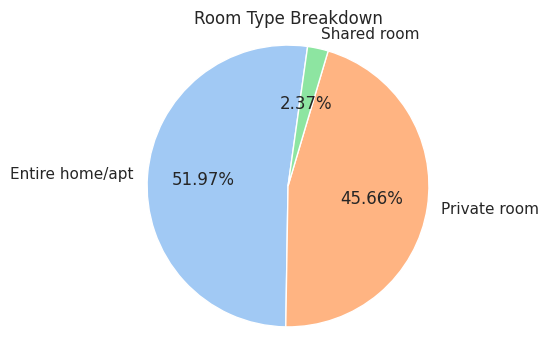

In [ ]:
# @title
sns.set(style="whitegrid")
plt.figure(figsize=(4, 4))
sns.set_palette("pastel")
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.2f%%', startangle=82)
plt.title('Room Type Breakdown')
plt.axis('equal')
plt.show()


#### Room type breakdown by neighborhood group

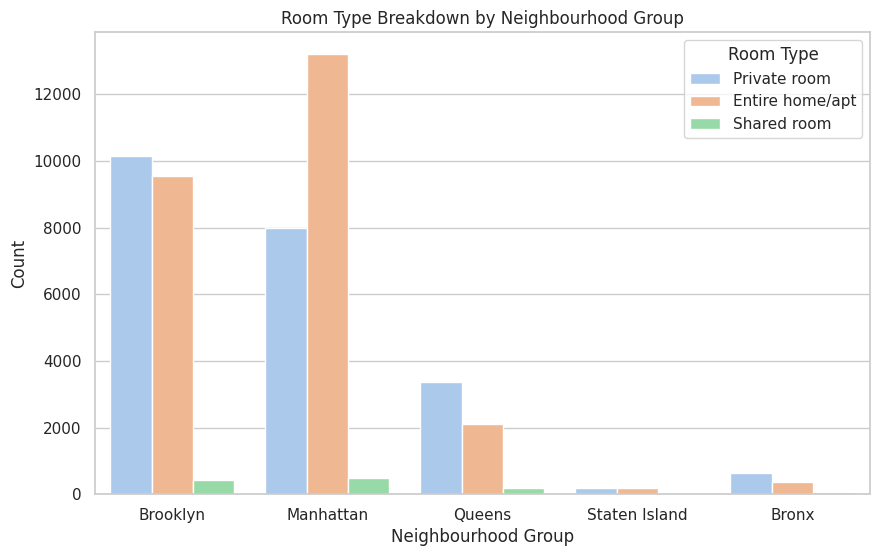

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette='pastel')

plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Room Type Breakdown by Neighbourhood Group')

plt.legend(title='Room Type')

plt.show()


#### Utilization distribution across Manhattan (using reviews as proxy)

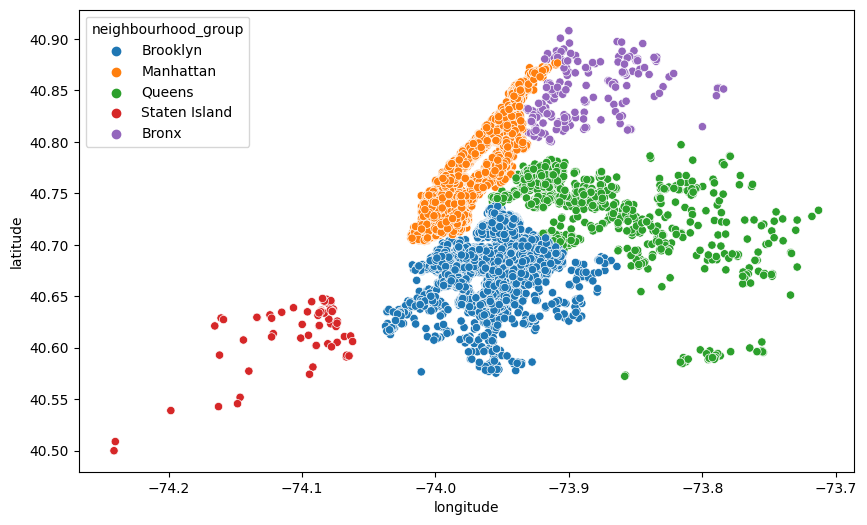

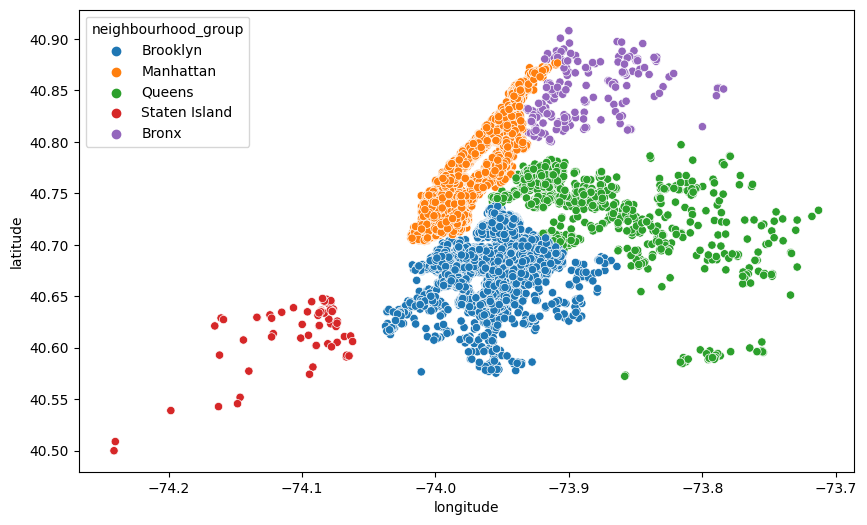

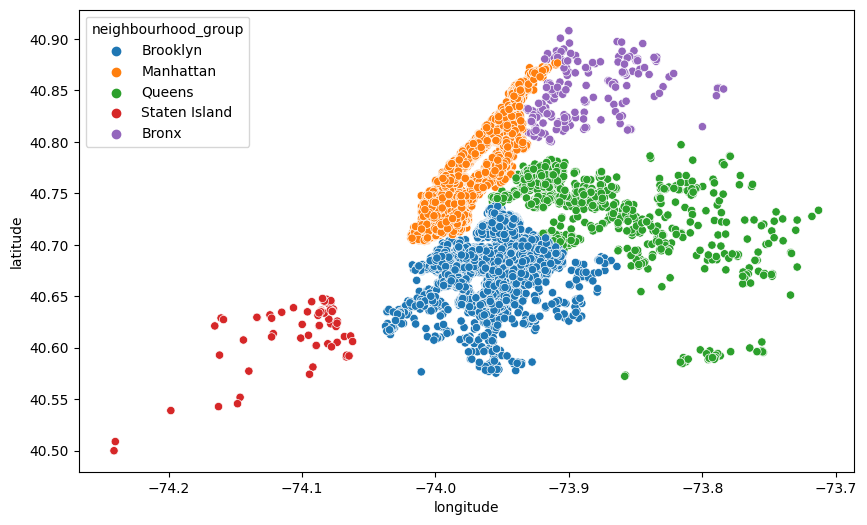

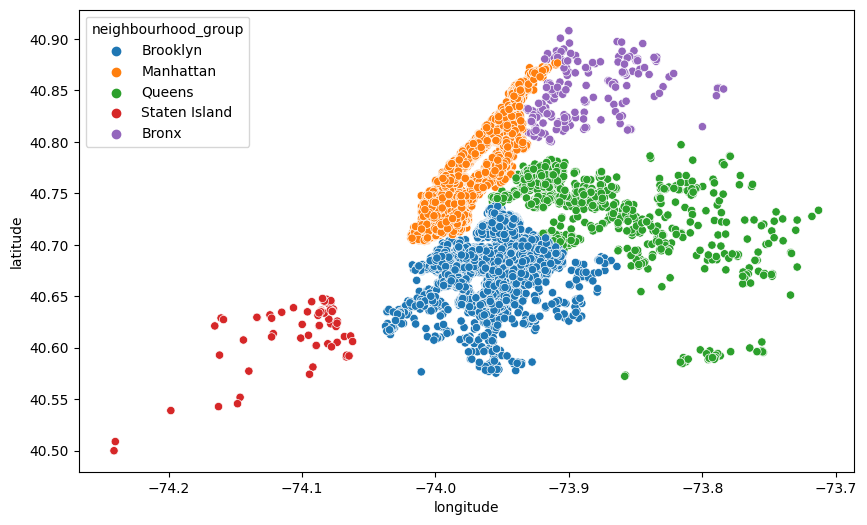

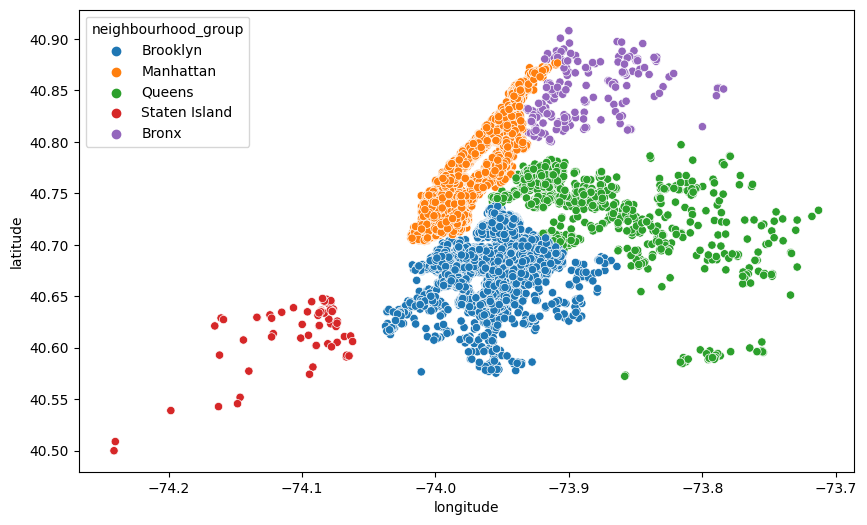

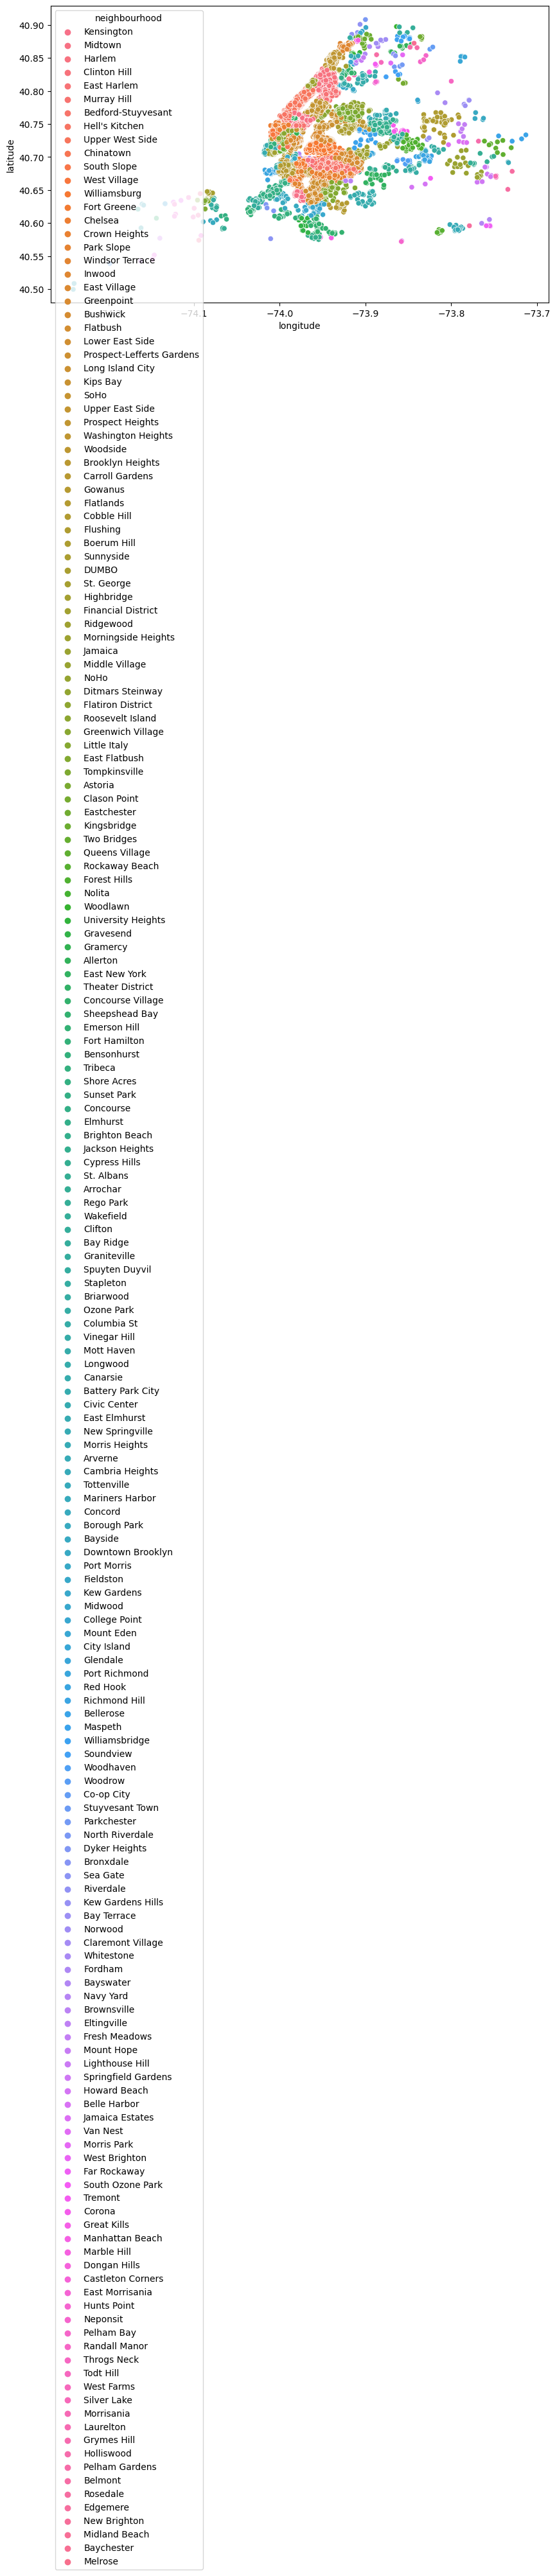

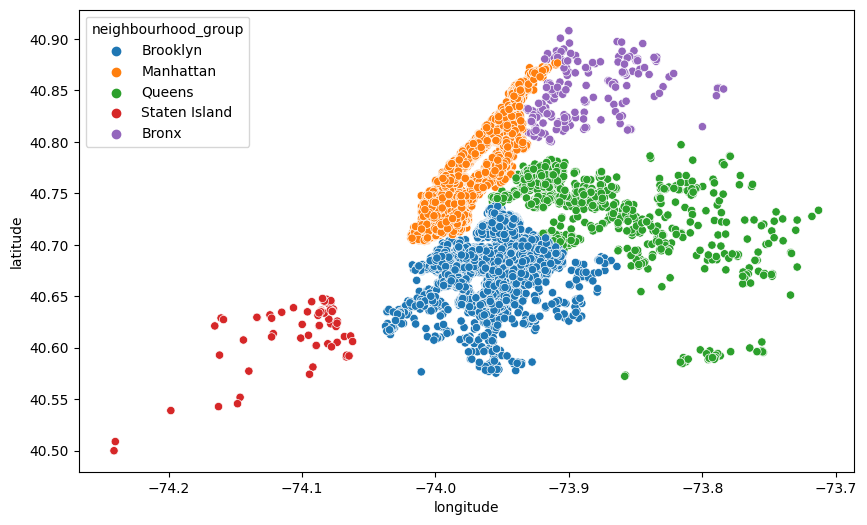

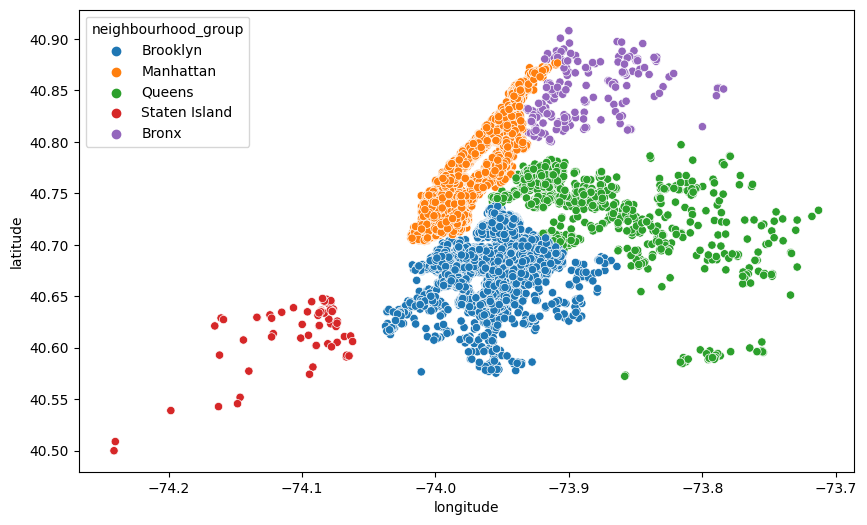

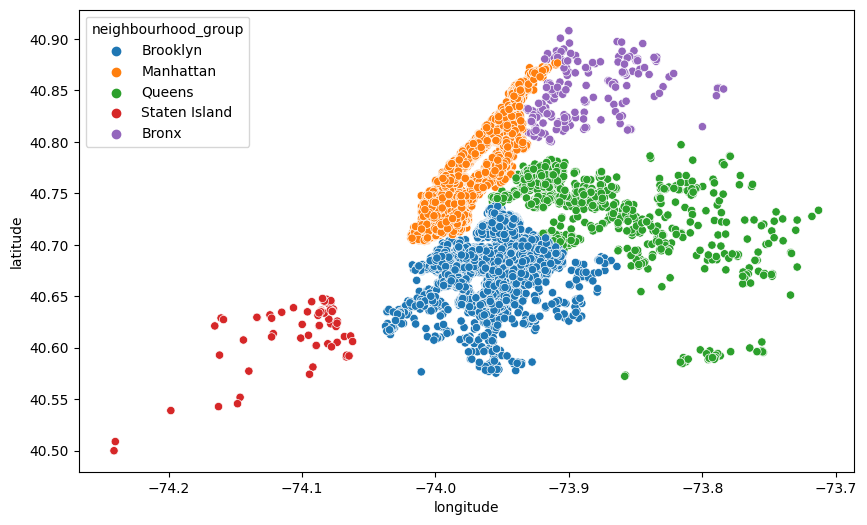

<Figure size 1000x600 with 0 Axes>

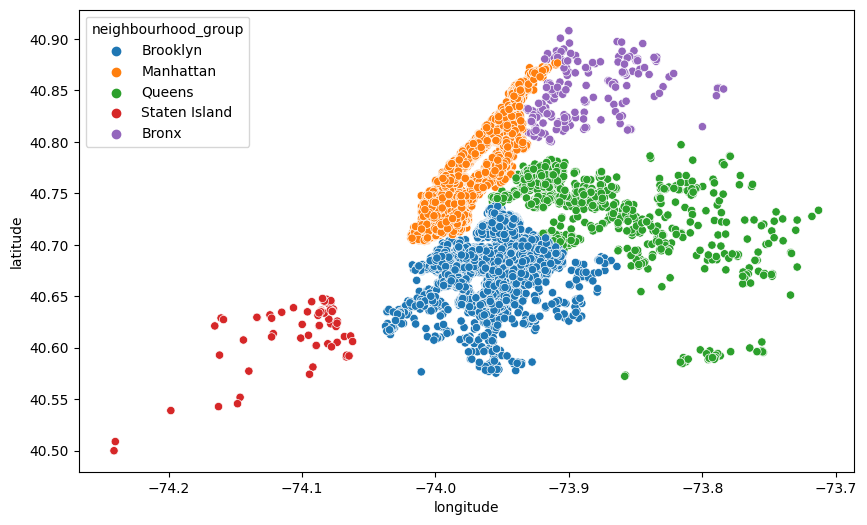

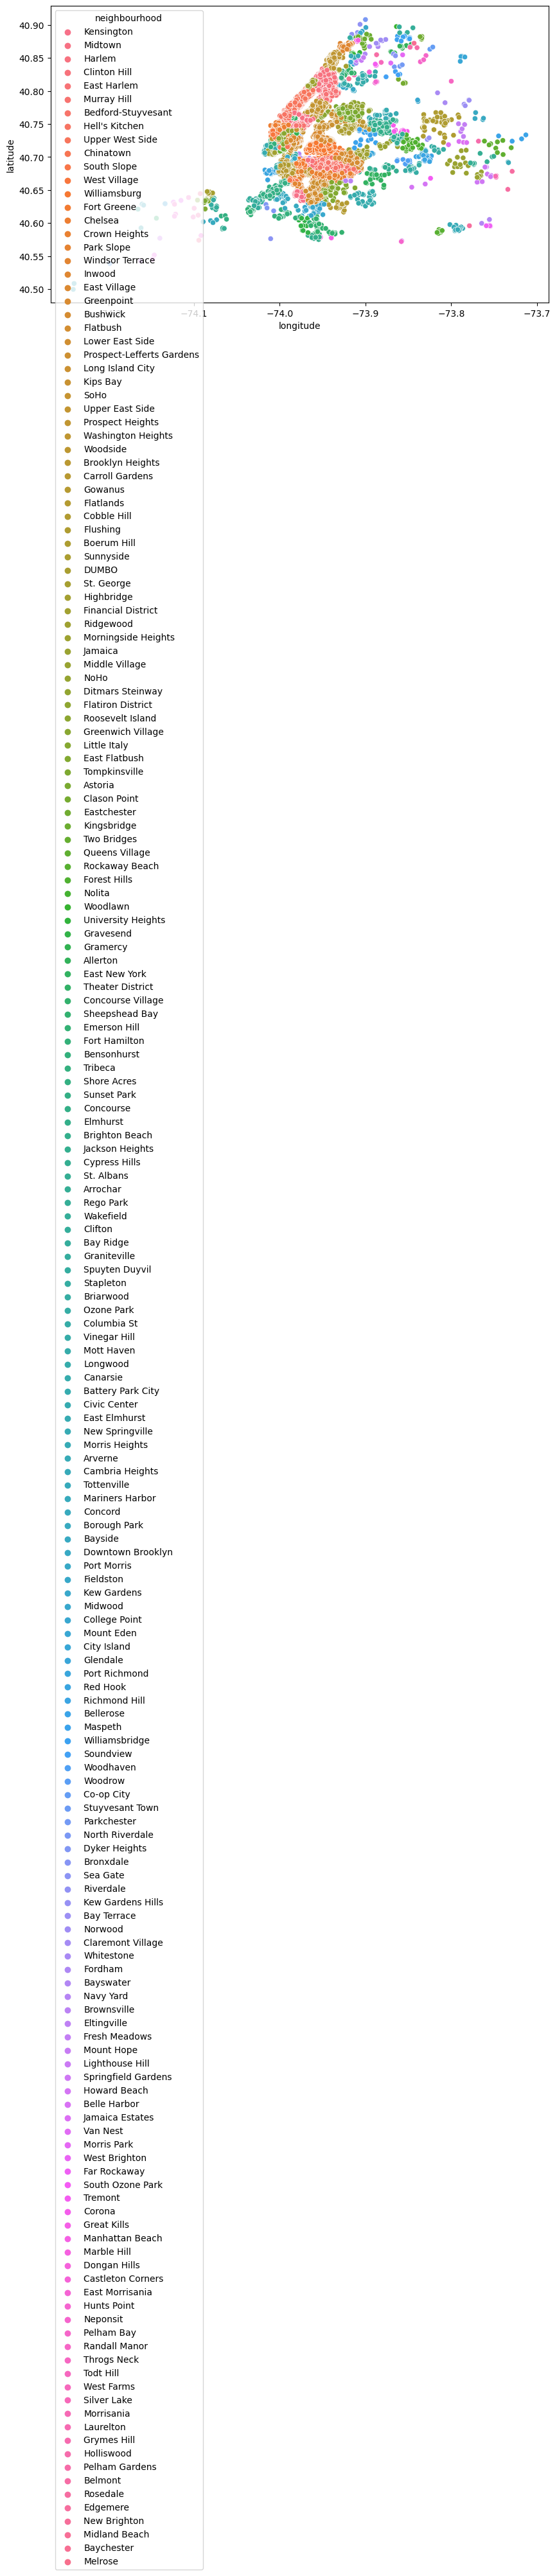

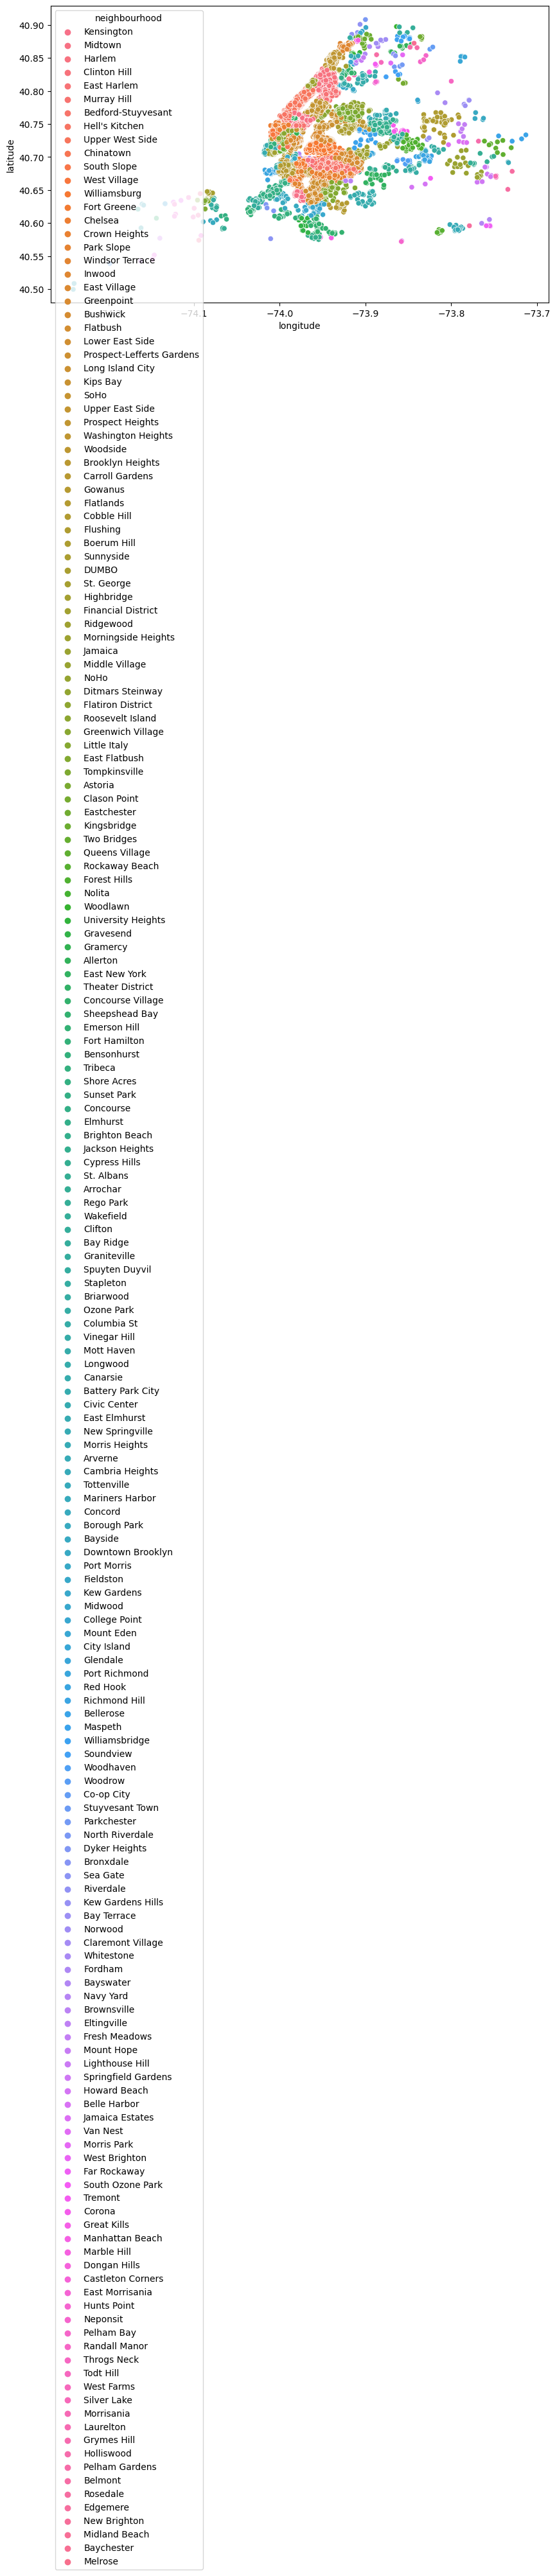

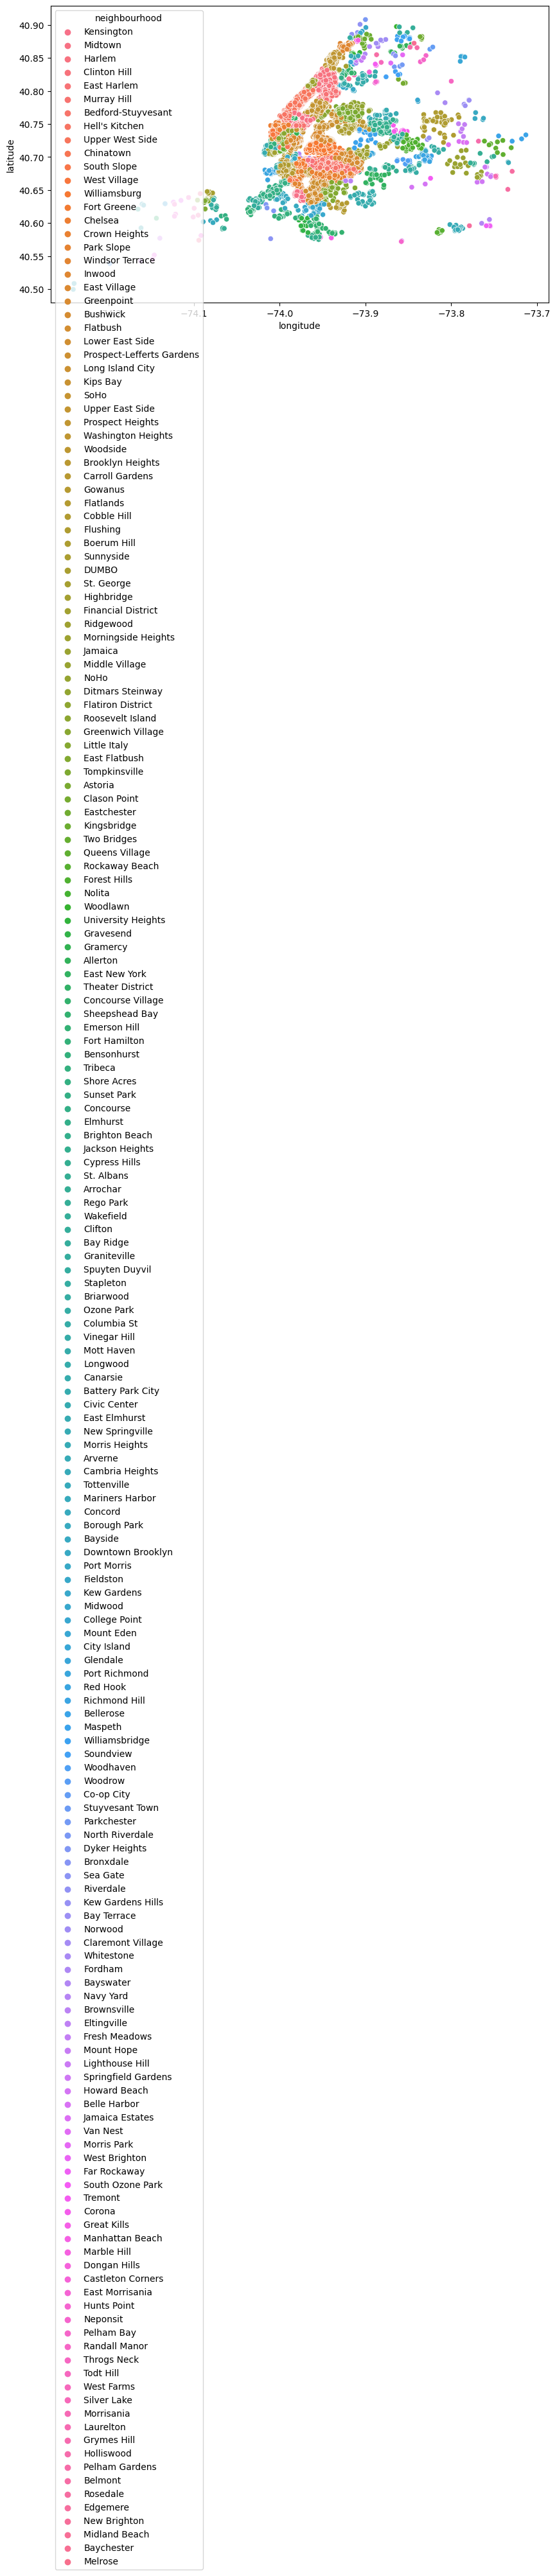

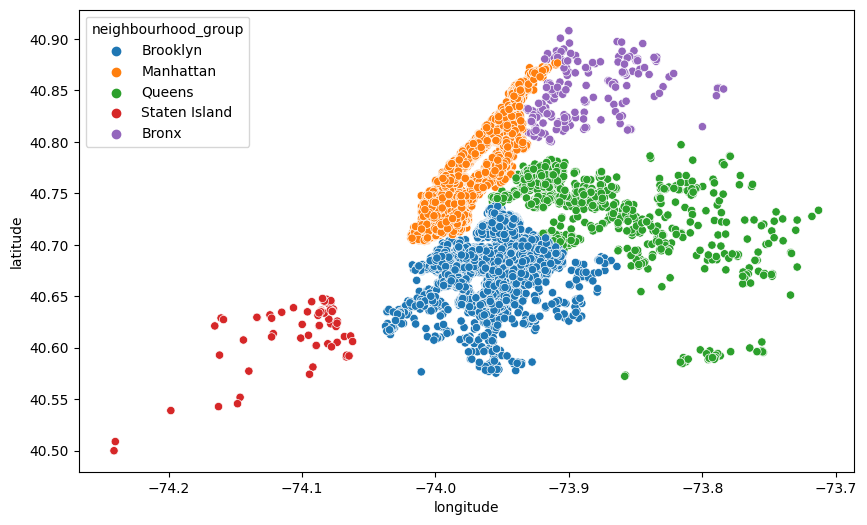

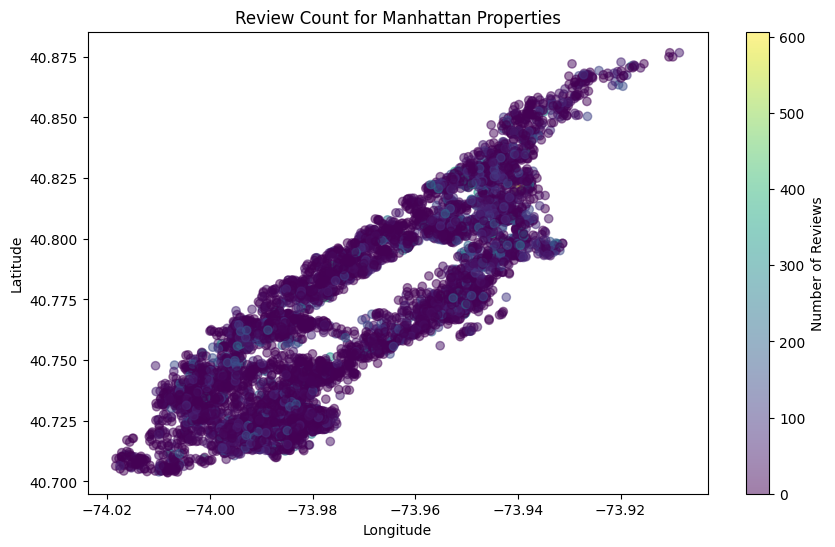

In [ ]:
manhattan_data = df[df['neighbourhood_group'] == 'Manhattan']

plt.figure(figsize=(10, 6))
plt.scatter(manhattan_data['longitude'], manhattan_data['latitude'], c=manhattan_data['number_of_reviews'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Number of Reviews')
plt.title('Review Count for Manhattan Properties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

map_manhattan = folium.Map(location=[40.7831, -73.9712], zoom_start=13)

for lat, lon, num_reviews in zip(manhattan_data['latitude'], manhattan_data['longitude'], manhattan_data['number_of_reviews']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Number of Reviews: {num_reviews}'
    ).add_to(map_manhattan)

map_manhattan.save('manhattan_map.html')

#### Testing utilization for normaility

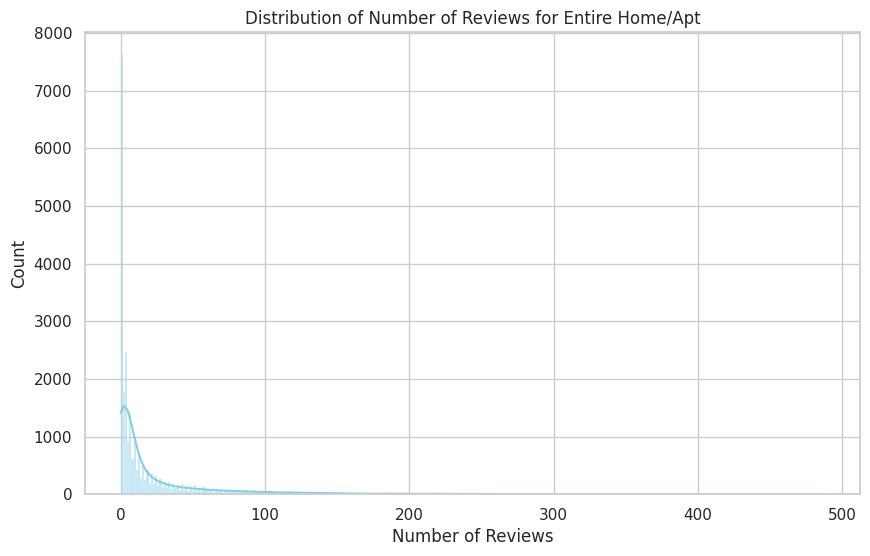

Shapiro-Wilk Test Statistic: 0.5782724618911743
P-value: 0.0
The data does not appear to be normally distributed (p <= 0.05)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy.stats import shapiro

entire_home_data = df[df['room_type'] == 'Entire home/apt']

plt.figure(figsize=(10, 6))
sns.histplot(entire_home_data['number_of_reviews'], kde=True, color='skyblue')

plt.title('Distribution of Number of Reviews for Entire Home/Apt')
plt.xlabel('Number of Reviews')

plt.show()

# Shapiro-Wilk normality test
stat, p_value = shapiro(entire_home_data['number_of_reviews'])

print(f'Shapiro-Wilk Test Statistic: {stat}')
print(f'P-value: {p_value}')

# Interpretation
if p_value > 0.05:
    print('The data appears to be normally distributed (p > 0.05)')
else:
    print('The data does not appear to be normally distributed (p <= 0.05)')


#### Distribution of units that are violating the new regulations

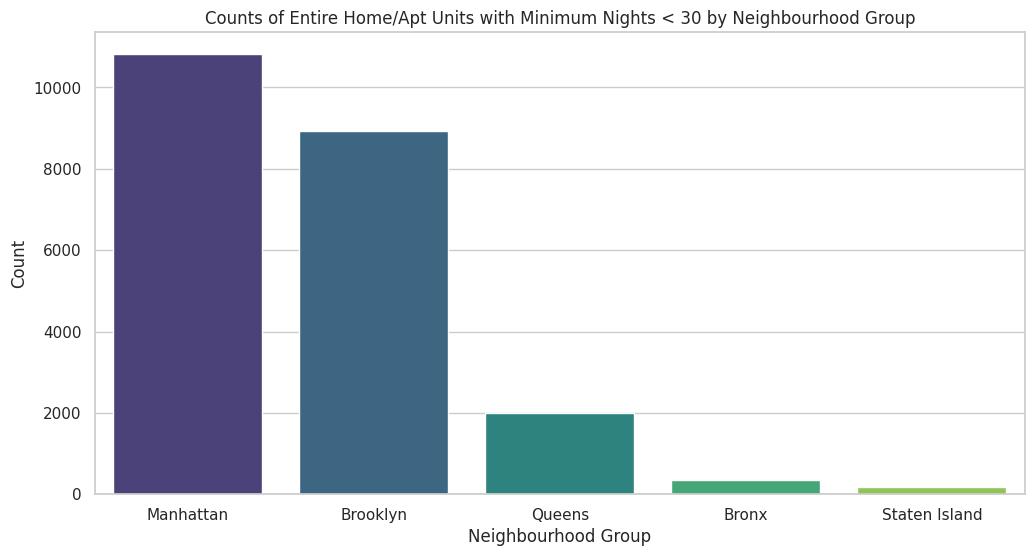

In [ ]:
filtered_data = df[(df['room_type'] == 'Entire home/apt') & (df['minimum_nights'] < 30)]
plt.figure(figsize=(12, 6))
sns.countplot(x='neighbourhood_group', data=filtered_data, palette='viridis')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Counts of Entire Home/Apt Units with Minimum Nights < 30 by Neighbourhood Group')
plt.show()


#### Neighbourhoods plotted for long and lat
For comparison with price clusters below

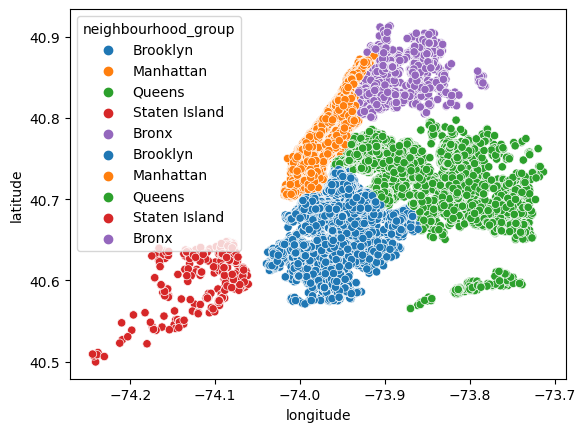

In [ ]:
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)
plt.show()

#### Price clusters across NYC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


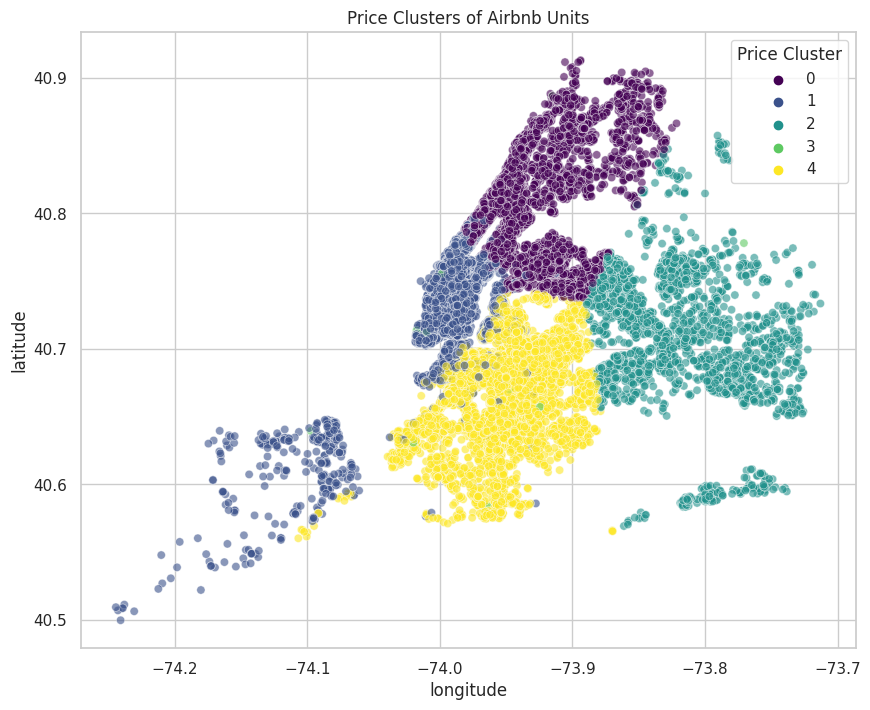

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

cluster_data = df[['latitude', 'longitude', 'price']]

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['price_cluster'] = kmeans.fit_predict(cluster_data_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='price_cluster', palette='viridis', data=df, alpha=0.6)

plt.legend(title='Price Cluster', bbox_to_anchor=(1, 1))

plt.title('Price Clusters of Airbnb Units')
plt.show()


# show on a map
map_center = [df['latitude'].mean(), df['longitude'].mean()]
map_clusters = folium.Map(location=map_center, zoom_start=12)

for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue' if row['price_cluster'] == 0 else 'green' if row['price_cluster'] == 1 else 'orange' if row['price_cluster'] == 2 else 'red',
        fill=True,
        fill_color='blue' if row['price_cluster'] == 0 else 'green' if row['price_cluster'] == 1 else 'orange' if row['price_cluster'] == 2 else 'red',
        fill_opacity=0.6,
        popup=f'Price Cluster: {row["price_cluster"]}'
    ).add_to(map_clusters)

map_clusters.save('price_clusters_map.html')

map_clusters


#### Descriptive statistics and Distribution analysis of numerical variables

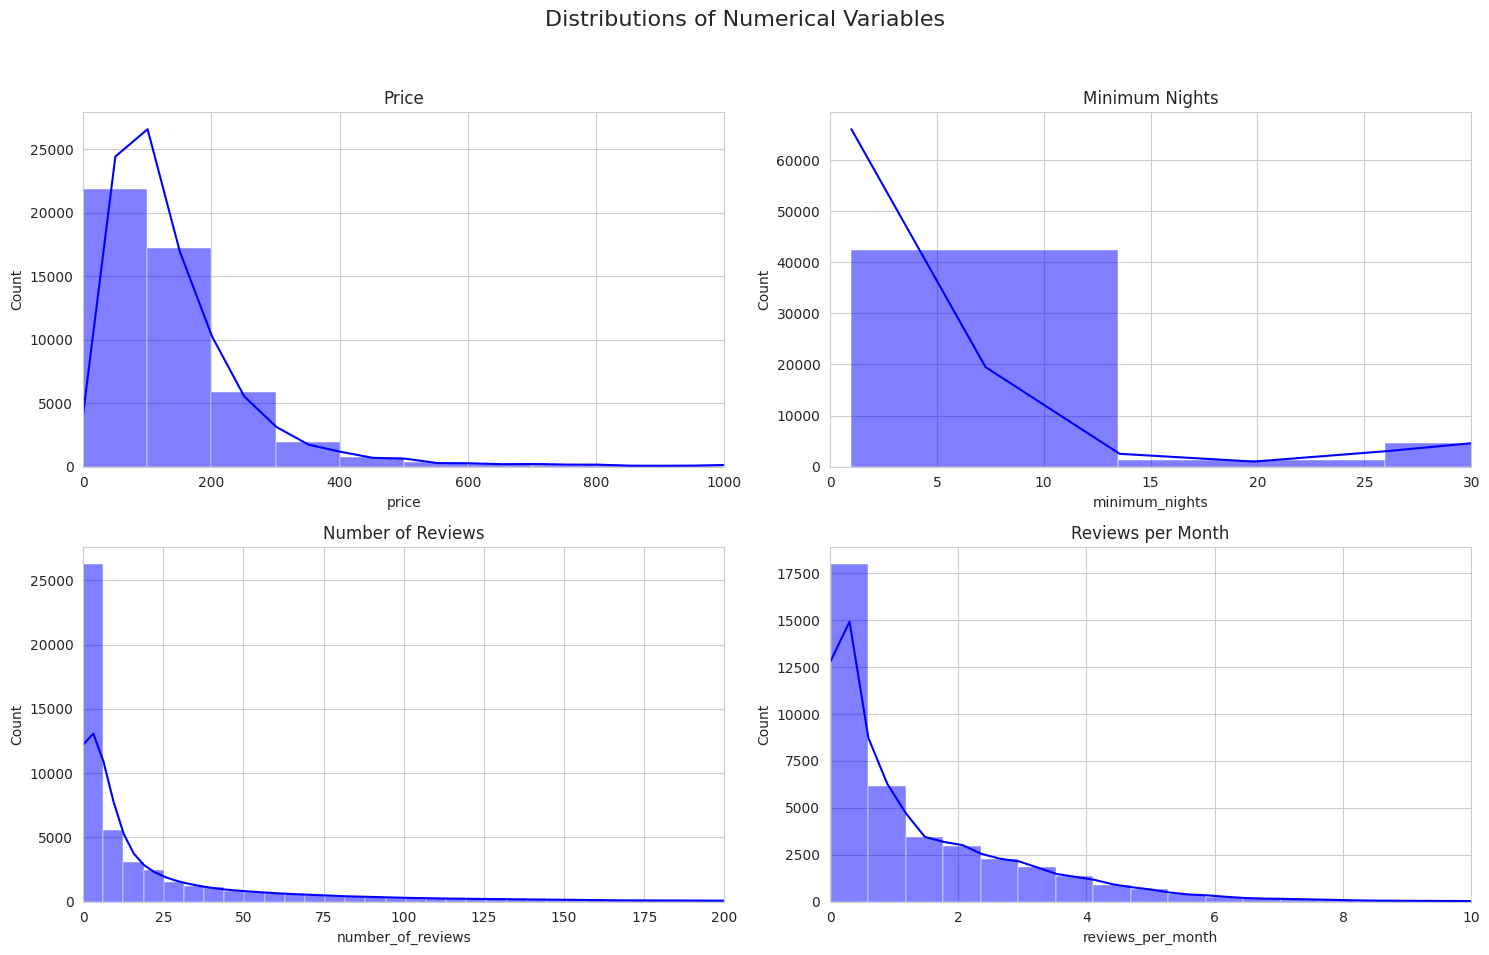

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [ ]:
# Descriptive statistics of the numerical features
numerical_stats = df.describe()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of key numerical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distributions of Numerical Variables', fontsize=16)

# Price distribution
sns.histplot(df['price'], bins=100, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('Price')
axes[0, 0].set_xlim(0, 1000)

# Minimum Nights distribution
sns.histplot(df['minimum_nights'], bins=100, ax=axes[0, 1], kde=True, color='blue')
axes[0, 1].set_title('Minimum Nights')
axes[0, 1].set_xlim(0, 30)  # Limiting to a reasonable range

# Number of Reviews distribution
sns.histplot(df['number_of_reviews'], bins=100, ax=axes[1, 0], kde=True, color='blue')
axes[1, 0].set_title('Number of Reviews')
axes[1, 0].set_xlim(0, 200)  # Limiting to a reasonable range

# Reviews per Month distribution
sns.histplot(df[df['reviews_per_month'].notnull()]['reviews_per_month'], bins=100, ax=axes[1, 1], kde=True, color='blue')
axes[1, 1].set_title('Reviews per Month')
axes[1, 1].set_xlim(0, 10)  # Limiting to a reasonable range

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print(numerical_stats)


#### Missing Values, Categorical Variables and Correlations

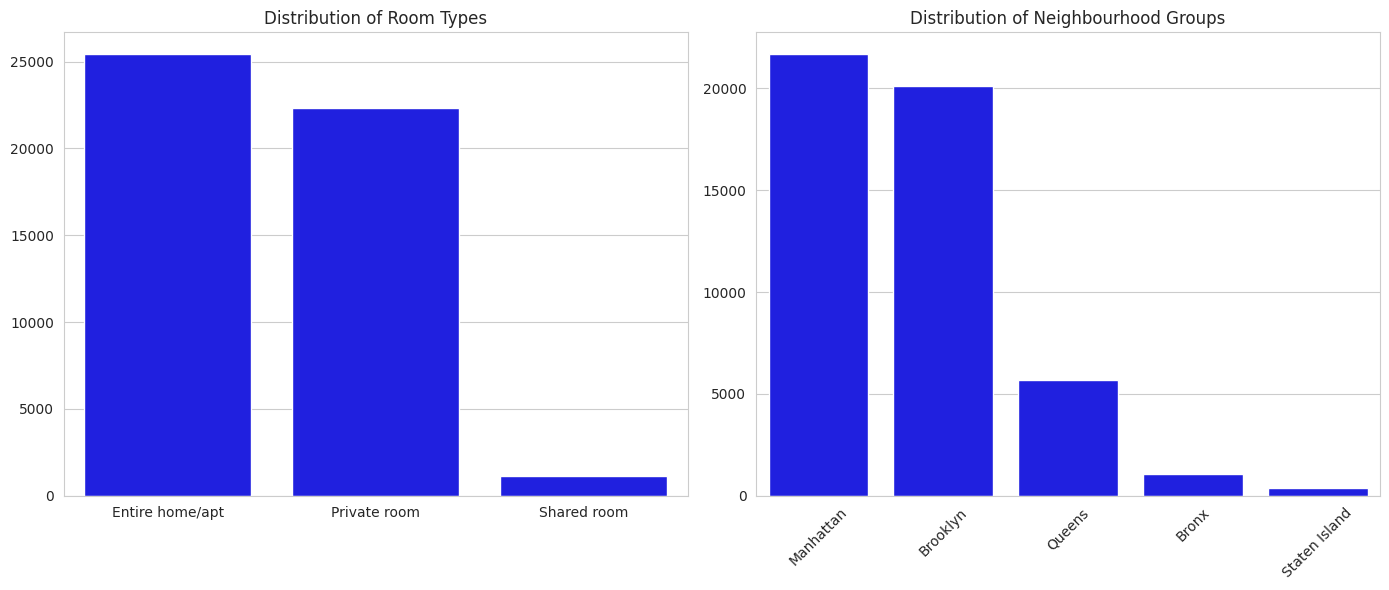

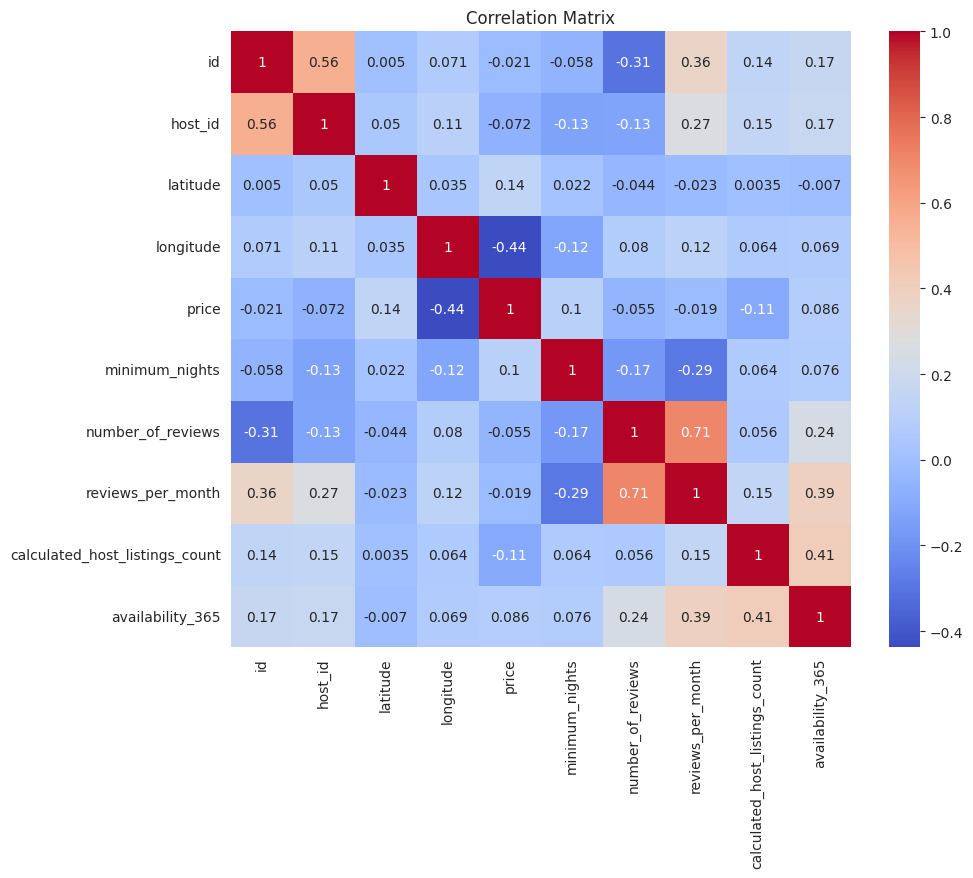

In [ ]:

# Analyzing Missing Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})

# Exploring Categorical Variables: Room types and Neighbourhood groups
room_type_counts = df['room_type'].value_counts()
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()

# Plotting the distributions of categorical variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Room Types')
sns.barplot(x=neighbourhood_group_counts.index, y=neighbourhood_group_counts.values, ax=axes[1], color='blue')
axes[1].set_title('Distribution of Neighbourhood Groups')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()

# Investigating Correlations between numerical variables --> For the non-linearity of the data, we will employ Spearman's Rank Correlation

numerical_vars = ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']

numeric_df = df[[*numerical_vars]]
correlation_matrix = numeric_df.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#### Correlation Investigation for expensive listings, by identifying and isolating the listings that fall under the "extremely expensive" (price > 5000) category.


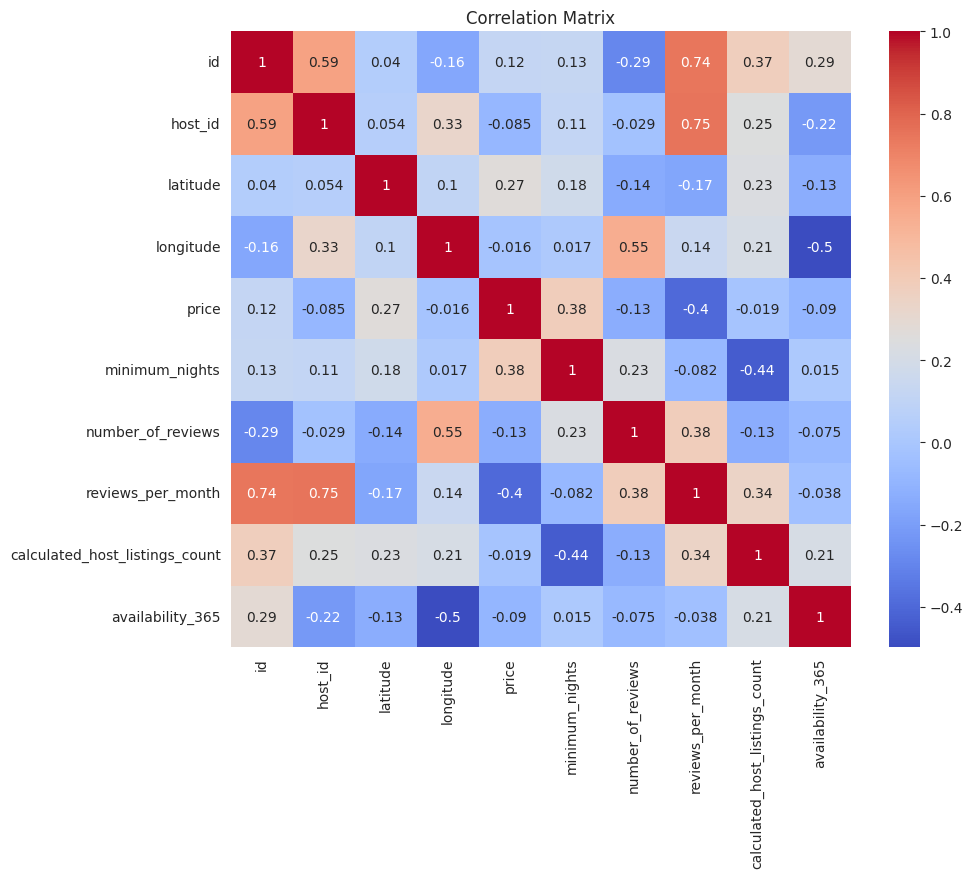

In [ ]:
numeric_df = df[[*numerical_vars]]
correlation_matrix = numeric_df[numeric_df['price'] >= 5000].corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


#### Outliers




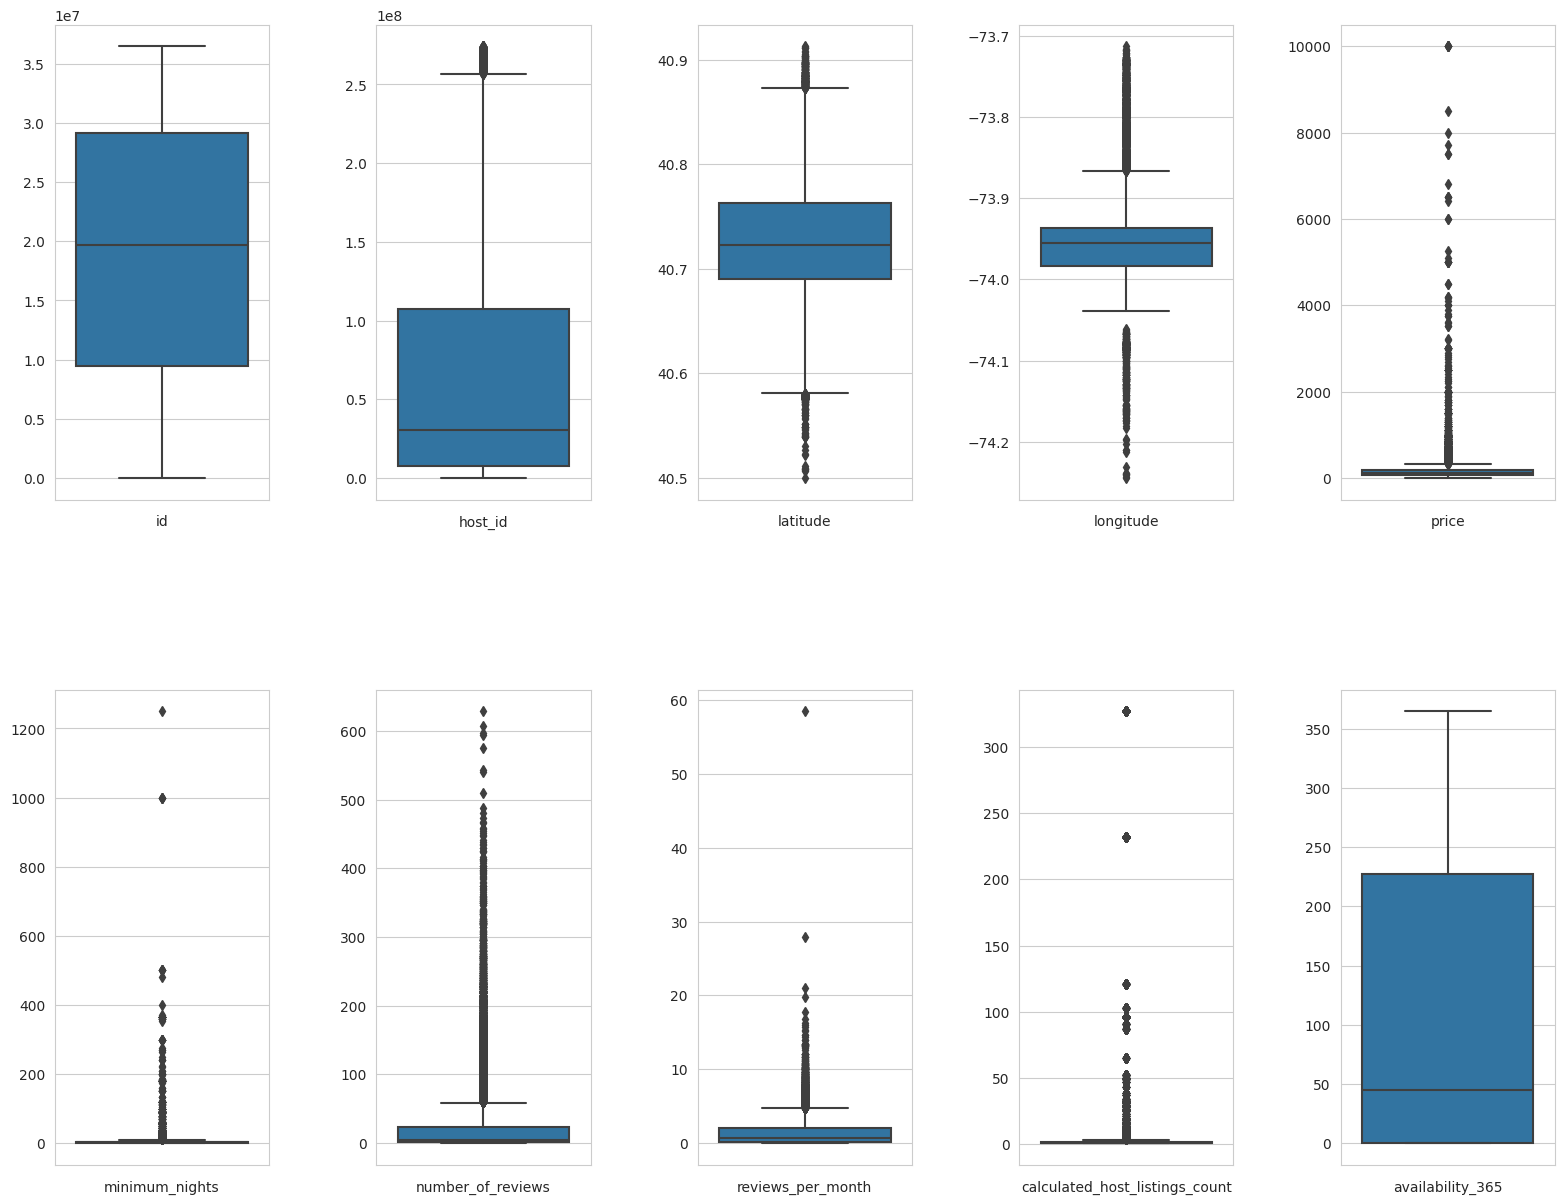

In [ ]:
# List of numerical variables you want to plot
numerical_vars = ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']

# initialise figure with 5 subplots in a row
fig, ax = plt.subplots(2, 5, figsize=(10, 6))

index = 0
for i, row in enumerate(ax):
  for j, cell in enumerate(row):
    if index < 0 or index >= len(numerical_vars):
      break

    # draw boxplot
    sns.boxplot(data=df[numerical_vars[index]], ax=ax[i][j])
    ax[i][j].set_xlabel(numerical_vars[index])
    index += 1
    cell.set_xticklabels([])

plt.subplots_adjust(left=1, bottom=0.1, right=2.5, top=2, wspace=0.5, hspace=0.4)
plt.show()

#### Heatmap Avg Price

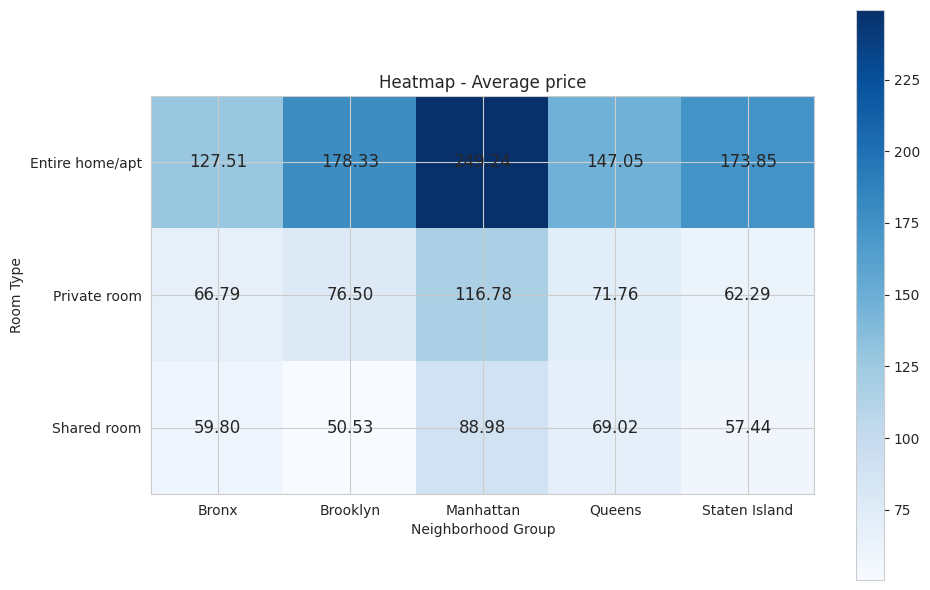

In [ ]:
# Create a pivot table or crosstab
heatmap = pd.crosstab(index=df['room_type'], columns=df['neighbourhood_group'], values=df['price'], aggfunc='mean')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap, cmap='Blues', interpolation='nearest')
plt.title('Heatmap - Average price')
plt.xlabel('Neighborhood Group')
plt.ylabel('Room Type')
plt.colorbar()

# Display the values in the cells
for i in range(len(heatmap.index)):
  for j in range(len(heatmap.columns)):
    plt.text(j, i, f'{heatmap.iloc[i, j]:.2f}', ha='center', va='center', fontsize=12)

plt.xticks(range(len(heatmap.columns)), heatmap.columns)
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.tight_layout()

# Show the plot
plt.show()

#### Heatmap Minimum Nights

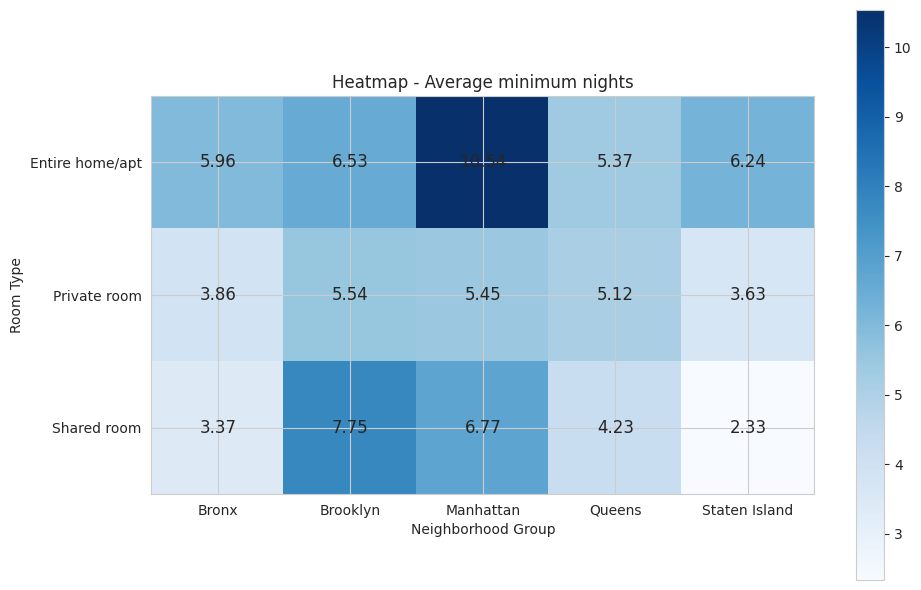

In [ ]:
# Create a pivot table or crosstab
heatmap = pd.crosstab(index=df['room_type'], columns=df['neighbourhood_group'], values=df['minimum_nights'], aggfunc='mean')

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(heatmap, cmap='Blues', interpolation='nearest')
plt.title('Heatmap - Average minimum nights')
plt.xlabel('Neighborhood Group')
plt.ylabel('Room Type')
plt.colorbar()

# Display the values in the cells
for i in range(len(heatmap.index)):
  for j in range(len(heatmap.columns)):
    plt.text(j, i, f'{heatmap.iloc[i, j]:.2f}', ha='center', va='center', fontsize=12)

plt.xticks(range(len(heatmap.columns)), heatmap.columns)
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.tight_layout()

# Show the plot
plt.show()